#1. Google Play Store apps and reviews
#2. Data cleaning
3. Correcting data types
4. Exploring app categories
5. Distribution of app ratings
6. Size and price of an app
7. Relation between app category and app price
8. Filter out "junk" apps
9. Popularity of paid apps vs free apps
10. Sentiment analysis of user reviews

In [1]:
#importing of libaries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#from google.colab import files
#uploaded = files.upload()

In [2]:
gps = pd.read_csv('googleplaystore.csv')
gps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [3]:
# Uploading review dataset
#from google.colab import files
#uploaded1 = files.upload()

In [4]:
gpsr = pd.read_csv('googleplaystore_user_reviews.csv')
gpsr

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [5]:
#DATA Cleaning
gps.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

#DATA CLEANING

In [6]:
gpsr.isna().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [7]:
#information on Duplicate/table 1
gps.duplicated().sum()

483

In [8]:
#information on Duplicate dataset/table 2

gpsr.duplicated().sum()

33616

In [9]:
gps["App"].duplicated().sum()

1181

In [10]:
gps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [11]:
# Dropping duplicated values in the first dataset
gpsA=gps.drop_duplicates(keep='first')
gpsA.duplicated().sum()

0

In [12]:
# Dropping duplicated values in the second dataset
gpsR=gpsr.drop_duplicates(keep='first')
gpsR.duplicated().sum()

0

In [13]:
gpsR.isnull().sum()

App                         0
Translated_Review         987
Sentiment                 982
Sentiment_Polarity        982
Sentiment_Subjectivity    982
dtype: int64

In [14]:
gpsA.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [15]:
gpsA[gpsA.Type.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [16]:
# Filling NA in Type column
gpsA["Type"].fillna("Free")
gpsA.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [17]:
# Checking null values in the Content Rating
gpsA[gpsA["Content Rating"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [18]:
# Dropping NA values 
gpsA.dropna(subset=["Content Rating"], inplace=False)
gpsA.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [19]:
gpsA2=gpsA.copy()
gpsA2.drop(["Last Updated", "Current Ver", "Android Ver"], axis=1, inplace=True)
gpsA2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity


In [20]:
#Removing characters
col_clean = ["Size", "Installs", "Price"]
stuffs_remove = ["M","k", "+", "$",","]
for col in col_clean:
    for stuffs in stuffs_remove:
        gpsA2[col] = gpsA2[col].apply(lambda x: x.replace(stuffs,""))

gpsA2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000,Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity


In [80]:
gpsA2['Size'].unique()

array([1.90e+01, 1.40e+01, 8.70e+00, 2.50e+01, 2.80e+00, 5.60e+00,
       2.90e+01, 3.30e+01, 3.10e+00, 2.80e+01, 1.20e+01, 2.00e+01,
       2.10e+01, 3.70e+01, 2.70e+00, 5.50e+00, 1.70e+01, 3.90e+01,
       3.10e+01, 4.20e+00, 7.00e+00, 2.30e+01, 6.00e+00, 6.10e+00,
       4.60e+00, 9.20e+00, 5.20e+00, 1.10e+01, 2.40e+01, 0.00e+00,
       9.40e+00, 1.50e+01, 1.00e+01, 1.20e+00, 2.60e+01, 8.00e+00,
       7.90e+00, 5.60e+01, 5.70e+01, 3.50e+01, 5.40e+01, 2.01e+02,
       3.60e+00, 5.70e+00, 8.60e+00, 2.40e+00, 2.70e+01, 2.50e+00,
       1.60e+01, 3.40e+00, 8.90e+00, 3.90e+00, 2.90e+00, 3.80e+01,
       3.20e+01, 5.40e+00, 1.80e+01, 1.10e+00, 2.20e+00, 4.50e+00,
       9.80e+00, 5.20e+01, 9.00e+00, 6.70e+00, 3.00e+01, 2.60e+00,
       7.10e+00, 3.70e+00, 2.20e+01, 7.40e+00, 6.40e+00, 3.20e+00,
       8.20e+00, 9.90e+00, 4.90e+00, 9.50e+00, 5.00e+00, 5.90e+00,
       1.30e+01, 7.30e+01, 6.80e+00, 3.50e+00, 4.00e+00, 2.30e+00,
       7.20e+00, 2.10e+00, 4.20e+01, 7.30e+00, 9.10e+00, 5.50e

In [22]:
gpsA2.dropna(subset=["Content Rating"], inplace=True)
gpsA2.dropna(subset=["Type"], inplace=True)
#gpsA2=gpsA2.fillna({ 'Rating' : 'Non specified'})
gpsA2.isnull().sum()

App                  0
Category             0
Rating            1464
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
dtype: int64

# Correcting data types

In [23]:
gpsA2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10356 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10356 non-null  object 
 1   Category        10356 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10356 non-null  object 
 4   Size            10356 non-null  object 
 5   Installs        10356 non-null  object 
 6   Type            10356 non-null  object 
 7   Price           10356 non-null  object 
 8   Content Rating  10356 non-null  object 
 9   Genres          10356 non-null  object 
dtypes: float64(1), object(9)
memory usage: 890.0+ KB


In [24]:
# Correcting Data Types
gpsA2["Price"]=gpsA2["Price"].astype("float")
gpsA2["Installs"]=gpsA2["Installs"].astype("float")
#gpsA2["Size"]=gpsA2["Size"].astype("float")
gpsA2["Reviews"]=gpsA2["Reviews"].astype("int")
#gpsA2["Rating"]=gpsA2["Reviews"].astype("float")
gpsA2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10356 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10356 non-null  object 
 1   Category        10356 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10356 non-null  int32  
 4   Size            10356 non-null  object 
 5   Installs        10356 non-null  float64
 6   Type            10356 non-null  object 
 7   Price           10356 non-null  float64
 8   Content Rating  10356 non-null  object 
 9   Genres          10356 non-null  object 
dtypes: float64(3), int32(1), object(6)
memory usage: 849.5+ KB


In [50]:
gpsA2['Size'].unique()

array(['19', '14', '8.7', '25', '2.8', '5.6', '29', '33', '3.1', '28',
       '12', '20', '21', '37', '2.7', '5.5', '17', '39', '31', '4.2',
       '7.0', '23', '6.0', '6.1', '4.6', '9.2', '5.2', '11', '24',
       'Varies with device', '9.4', '15', '10', '1.2', '26', '8.0', '7.9',
       '56', '57', '35', '54', '201', '3.6', '5.7', '8.6', '2.4', '27',
       '2.5', '16', '3.4', '8.9', '3.9', '2.9', '38', '32', '5.4', '18',
       '1.1', '2.2', '4.5', '9.8', '52', '9.0', '6.7', '30', '2.6', '7.1',
       '3.7', '22', '7.4', '6.4', '3.2', '8.2', '9.9', '4.9', '9.5',
       '5.0', '5.9', '13', '73', '6.8', '3.5', '4.0', '2.3', '7.2', '2.1',
       '42', '7.3', '9.1', '55', '6.5', '1.5', '7.5', '51', '41', '48',
       '8.5', '46', '8.3', '4.3', '4.7', '3.3', '40', '7.8', '8.8', '6.6',
       '5.1', '61', '66', '79', '8.4', '118', '44', '695', '1.6', '6.2',
       '53', '1.4', '3.0', '5.8', '3.8', '9.6', '45', '63', '49', '77',
       '4.4', '4.8', '70', '6.9', '9.3', '10.0', '8.1', '36',

In [53]:
gpsA2['Size'] = gpsA2['Size'].str.replace('Varies with device', '0')

In [55]:
gpsA2['Size'].unique()

array(['19', '14', '8.7', '25', '2.8', '5.6', '29', '33', '3.1', '28',
       '12', '20', '21', '37', '2.7', '5.5', '17', '39', '31', '4.2',
       '7.0', '23', '6.0', '6.1', '4.6', '9.2', '5.2', '11', '24', '0',
       '9.4', '15', '10', '1.2', '26', '8.0', '7.9', '56', '57', '35',
       '54', '201', '3.6', '5.7', '8.6', '2.4', '27', '2.5', '16', '3.4',
       '8.9', '3.9', '2.9', '38', '32', '5.4', '18', '1.1', '2.2', '4.5',
       '9.8', '52', '9.0', '6.7', '30', '2.6', '7.1', '3.7', '22', '7.4',
       '6.4', '3.2', '8.2', '9.9', '4.9', '9.5', '5.0', '5.9', '13', '73',
       '6.8', '3.5', '4.0', '2.3', '7.2', '2.1', '42', '7.3', '9.1', '55',
       '6.5', '1.5', '7.5', '51', '41', '48', '8.5', '46', '8.3', '4.3',
       '4.7', '3.3', '40', '7.8', '8.8', '6.6', '5.1', '61', '66', '79',
       '8.4', '118', '44', '695', '1.6', '6.2', '53', '1.4', '3.0', '5.8',
       '3.8', '9.6', '45', '63', '49', '77', '4.4', '4.8', '70', '6.9',
       '9.3', '10.0', '8.1', '36', '84', '97', '2.0

In [57]:
# Correcting Data Types
gpsA2["Price"]=gpsA2["Price"].astype("float")
gpsA2["Installs"]=gpsA2["Installs"].astype("float")
gpsA2["Size"]=gpsA2["Size"].astype("float")
gpsA2["Reviews"]=gpsA2["Reviews"].astype("int")
#gpsA2["Rating"]=gpsA2["Reviews"].astype("float")
gpsA2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10356 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10356 non-null  object 
 1   Category        10356 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10356 non-null  int32  
 4   Size            10356 non-null  float64
 5   Installs        10356 non-null  float64
 6   Type            10356 non-null  object 
 7   Price           10356 non-null  float64
 8   Content Rating  10356 non-null  object 
 9   Genres          10356 non-null  object 
dtypes: float64(4), int32(1), object(5)
memory usage: 1.1+ MB


# Exploring app categories

Number of categories =  33


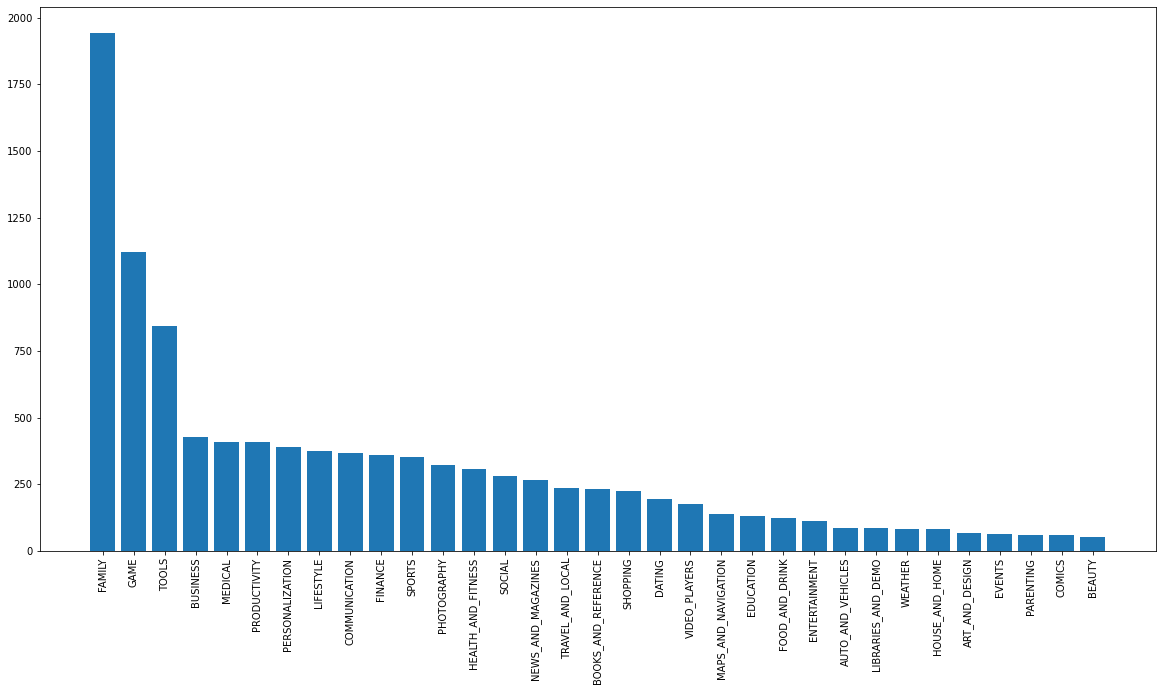

In [25]:
num_categories = gpsA2['Category'].nunique()
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category'. 
num_apps_in_category = gpsA2['Category'].value_counts()

fig = plt.figure()
fig.set_size_inches(20, 10)

plt.bar(x = num_apps_in_category.index, height = num_apps_in_category.values)
plt.xticks(rotation = 90)
plt.show()

# Distribution of app ratings

Average app rating =  4.187876743139908


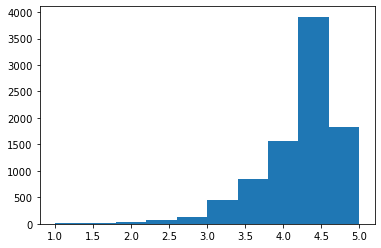

In [26]:
# With data cleaning and Type correction
avg_app_rating = gpsA2['Rating'].mean()
print('Average app rating = ', avg_app_rating)
plt.hist(x = gpsA2['Rating'])
plt.show()

# Size and price of an app

In [40]:
fig = plt.figure()
fig.set_size_inches(20, 10)
plt1 = sns.jointplot(gpsA2['Size'], gpsA2['Price'])

# Select apps whose 'Type' is 'Paid'
paid_apps = gpsA2[gpsA2['Type']== 'Paid']
plt2 = sns.distplot()
(x = paid_apps['Size'], y = paid_apps['Price'])

SyntaxError: invalid syntax (Temp/ipykernel_7968/3652801774.py, line 8)

C:\Users\hp\AppData\Local\Temp/ipykernel_7968/661893117.py:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title('Size and Price of an App', Size = 20)


Text(0.5, 1.0, 'Size and Price of an App')

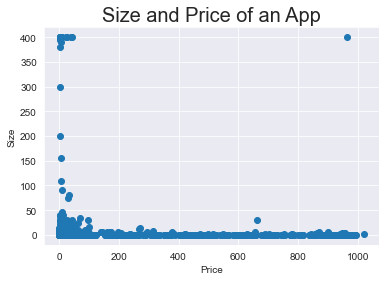

In [115]:

plt.scatter(data = gpsA2, x = 'Size', y = 'Price');
plt.xlabel('Price')
plt.ylabel('Size')
plt.title('Size and Price of an App', Size = 20)

C:\Users\hp\AppData\Local\Temp/ipykernel_7968/1940450193.py:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title('Size and Price of an App', Size = 15)


Text(0.5, 1.0, 'Size and Price of an App')

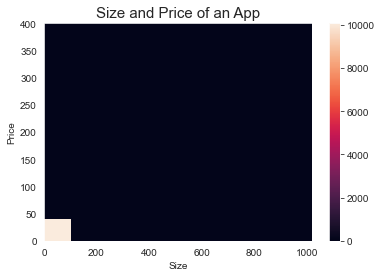

In [118]:
# plt.hist2d(data = gpsA2, x = 'Size', y = 'Price')
# plt.colorbar()
# plt.xlabel('Size')
# plt.ylabel('Price')
# plt.title('Size and Price of an App', Size = 15)

In [143]:
# x = Price
# y = Size
# corr=gpsA2.corr()

# sns.heatmap(corr, x,y, cmap='RdBu', vmin=-1, vmax=1, annot=True,
#             annot_kws={'fontsize':11, 'fontweight':'bold'})


# y = gpsA2['Price']
# m = gpsA2['Size']
# gpsA2 = pd.gpsA2([y,m]).TgpsA2.columns=['y','m']
# gpsA2['count'] = 1
# gpsA3 = gpsA2.groupby(['y','m'], as_index=False).count()
# gpsA2_p = pd.pivot_table(gpsA3,'count','m','y')
# sns.heatmap(gpsA2_p)

# Relation between app category and app price

Text(0.5, 1.0, 'App pricing trend across categories')

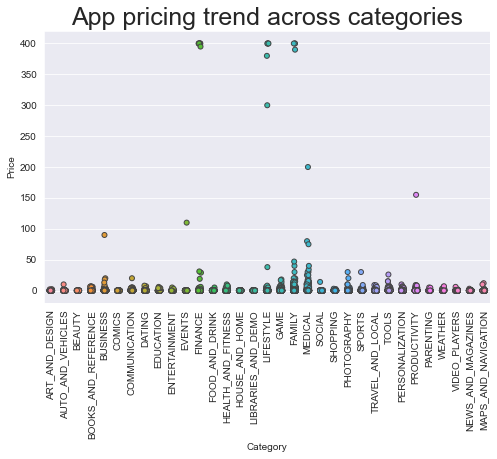

In [114]:
sns.set_style("darkgrid")
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)
# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = gpsA2['Category'], y = gpsA2['Price'], jitter=True, linewidth=1)
plt.xticks(rotation = 90)
ax.set_title('App pricing trend across categories', size = 25)

#i suggest we use line graph to show price trend rather than scatter plot

# Filter out "junk" apps

In [103]:
gpsA2.loc[gpsA2['App'].str.contains('junk', case = False)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
3461,Power Booster - Junk Cleaner & CPU Cooler & Boost,PRODUCTIVITY,4.5,9653,5.1,1000000.0,Free,0.0,Everyone,Productivity


# Popularity of paid apps vs free apps

In [87]:
free_paid = gpsA2[['Type']].value_counts().to_frame().rename(columns={0:'App'})

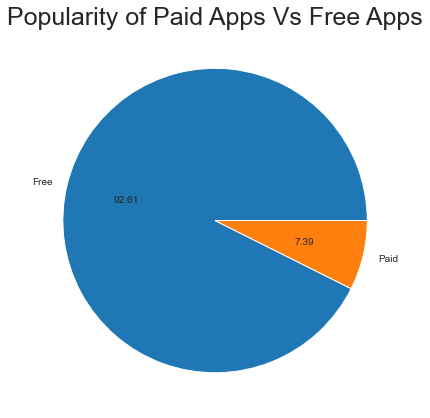

In [107]:
fig = plt.figure(figsize =(10, 7))
y=gpsA2[['Type']].value_counts()
label= ['Free','Paid']
plt.pie(y,labels=label, autopct = '%.2f')
plt.title('Popularity of Paid Apps Vs Free Apps', size =25)
plt.show()

# Sentiment analysis of user reviews

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

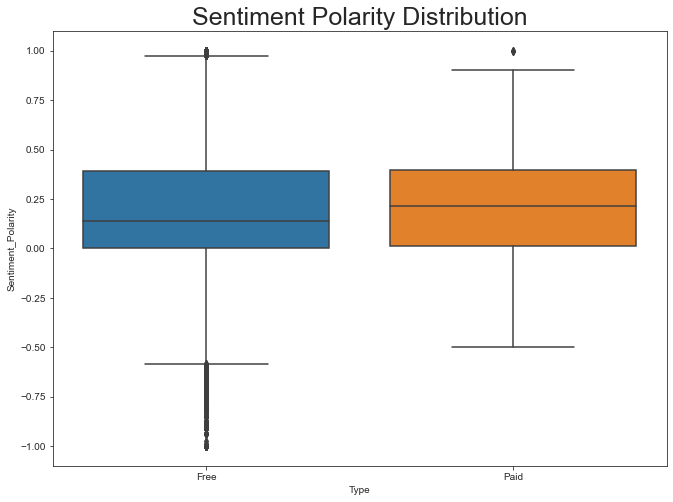

In [108]:
# Join the two dataframes
merged_df = pd.merge(gpsA2,gpsR, on = 'App')

# Drop NA values from Sentiment and Review columns
merged_df = merged_df.dropna(subset = ['Sentiment', 'Translated_Review', 'Sentiment_Polarity', 'Sentiment_Subjectivity'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = merged_df['Type'], y = merged_df['Sentiment_Polarity'], data = merged_df)
ax.set_title('Sentiment Polarity Distribution', size = 25)

Text(0.5, 1.0, 'Sentiment Subjectivity Distribution')

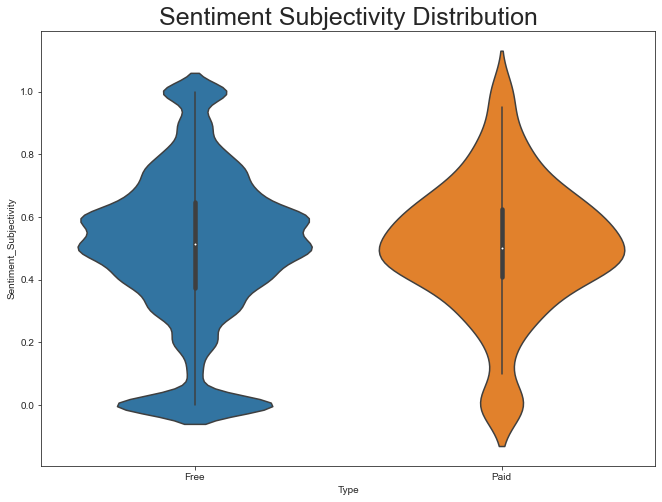

In [109]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment subjectivity for paid vs. free apps
ax = sns.violinplot(x = merged_df['Type'], y = merged_df['Sentiment_Subjectivity'], data = merged_df)
ax.set_title('Sentiment Subjectivity Distribution', size = 25)